<a href="https://colab.research.google.com/github/HassanSaeed107/Booston_Housing/blob/main/Boosten_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#import the data and display first 5 rows
df = pd.read_csv('/content/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#Display the Shape of Data

df.shape

(506, 14)

In [4]:
# Display Columns

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
#Display Unique numbers

df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [6]:
#Dispalay Statisitc values

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Display Missing Values
missing_values = df.isnull().sum()
print('Missing values are:\n', missing_values)

Missing values are:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [8]:

data_filled = df.fillna(df.mean())
print('Filled Values: ', data_filled)

Filled Values:          CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  MEDV  
0      

In [9]:
data_filled.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
#Split the X Variable and Y target

X = data_filled.drop('MEDV', axis=1)
y = data_filled['MEDV']

In [11]:
#Train the model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
# Linear Regression Model

model = LinearRegression()


In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Making Prediction on Test

y_pred = model.predict(X_test)
print('Y_Pred', y_pred)

Y_Pred [ 2.91432496e+01  3.65356675e+01  1.44925129e+01  2.50811104e+01
  1.84560923e+01  2.30104937e+01  1.81386861e+01  1.46265167e+01
  2.21158938e+01  2.08706364e+01  2.50758640e+01  1.87470982e+01
 -5.67498472e+00  2.17286655e+01  1.90464014e+01  2.54293420e+01
  1.96620047e+01  6.12420178e+00  4.09972355e+01  1.72352716e+01
  2.48905259e+01  3.02961849e+01  1.18008779e+01  2.29655895e+01
  1.73451595e+01  1.51051621e+01  2.10901065e+01  1.44883316e+01
  2.30923960e+01  1.94365043e+01  2.25439953e+01  2.52375663e+01
  2.59309510e+01  1.66289054e+01  1.64513986e+01  1.66143478e+01
  3.11105960e+01  2.02837991e+01  2.43569451e+01  2.26326769e+01
  1.45257750e+01  3.23698301e+01  4.30428488e+01  1.76390763e+01
  2.76326197e+01  1.64305143e+01  1.42484248e+01  2.61635938e+01
  1.97678160e+01  3.01463483e+01  2.09688785e+01  3.38338873e+01
  1.64161397e+01  2.63964842e+01  3.97974153e+01  2.20563187e+01
  1.86348862e+01  3.28326904e+01  2.54125467e+01  1.30089663e+01
  2.27876091e+01  

In [15]:
#Evualate the Model

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  25.01767202384268


In [16]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-Squared: ', r2)
print('Mean Squared Error: ', mae)

R-Squared:  0.6588520195508143
Mean Squared Error:  3.1499233573457692


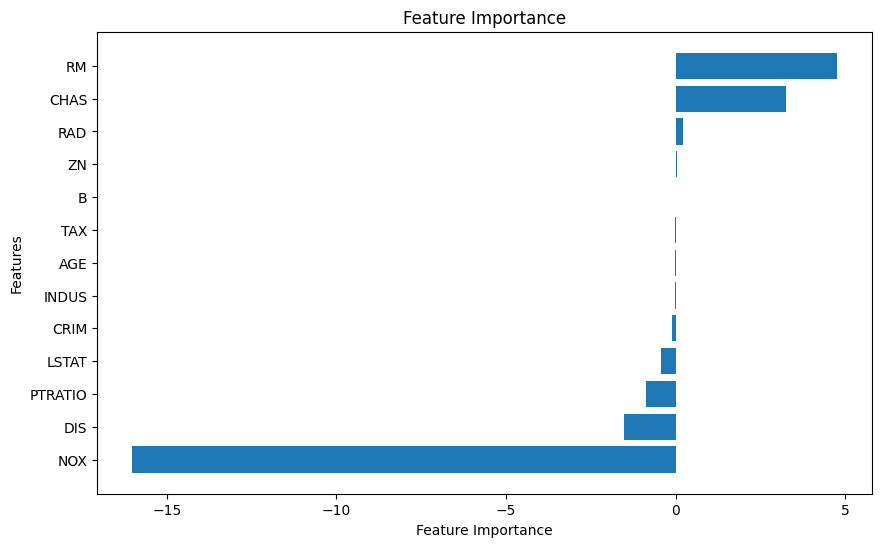

In [17]:
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

In [18]:
#Correlation Matrix

correlation_matrix = data_filled.corr()
print('Correlation Matrix:', correlation_matrix)

Correlation Matrix:              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       

In [19]:
# Define a function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

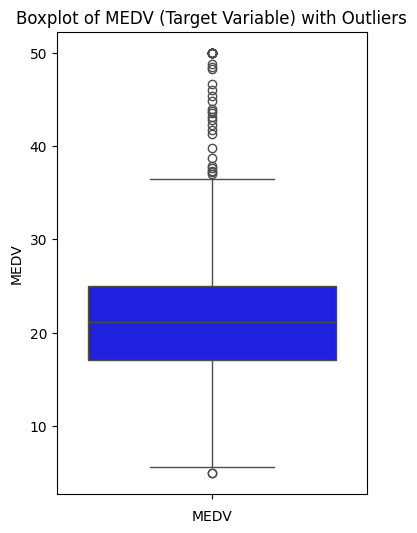

In [20]:
# Detect outliers in the target variable 'MEDV'
outliers = detect_outliers(data_filled['MEDV'])

# Visualize outliers using a boxplot
plt.figure(figsize=(4, 6))
sns.boxplot(data_filled['MEDV'], color='blue')
plt.title('Boxplot of MEDV (Target Variable) with Outliers')
plt.xlabel('MEDV')
plt.show()

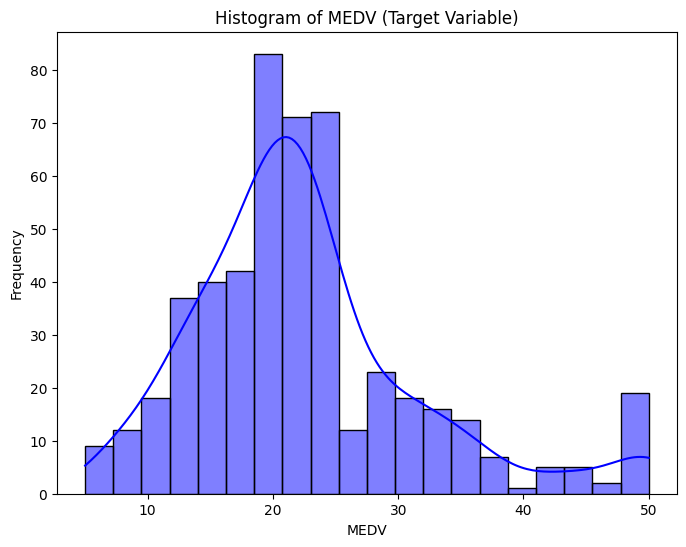

In [21]:
#Histogram

plt.figure(figsize=(8, 6))
sns.histplot(data_filled['MEDV'], bins=20, kde=True, color='blue')
plt.title('Histogram of MEDV (Target Variable)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Calculate the correlation matrix
corr_matrix = data_filled.corr()

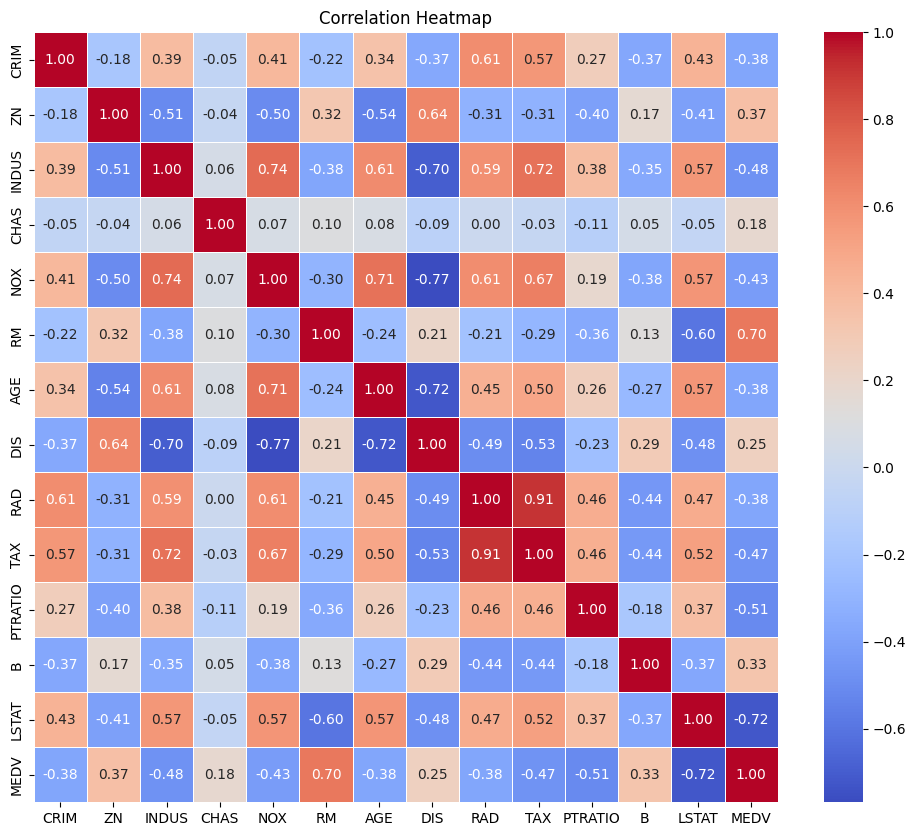

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()